# Graph Example

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.covariance import GraphicalLassoCV

data = pd.read_excel("data/graph/13. cd3cd28icam2+u0126.xls")

In [2]:
data

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,21.9,25.9,9.91,211.0,62.10,27.40,43.7,573.0,11.20,41.8,50.0
1,28.1,20.4,6.73,186.0,38.50,10.20,57.8,583.0,10.00,52.8,45.7
2,75.0,69.8,85.10,65.5,35.20,43.30,111.0,3368.0,14.50,49.6,93.1
3,34.0,29.2,16.50,30.0,6.49,29.40,46.6,562.0,17.30,56.2,193.0
4,21.7,25.5,9.14,16.4,15.00,25.00,51.9,922.0,7.91,13.8,30.8
...,...,...,...,...,...,...,...,...,...,...,...
754,81.3,71.0,37.90,331.0,60.40,10.30,45.7,1731.0,13.90,34.6,29.7
755,23.5,24.8,7.91,223.0,37.50,9.06,41.0,1877.0,9.47,35.2,43.7
756,215.0,231.0,36.80,37.5,20.70,30.20,67.3,1540.0,10.60,39.2,71.0
757,23.1,25.0,11.00,178.0,50.00,16.70,40.7,578.0,9.39,18.8,56.2


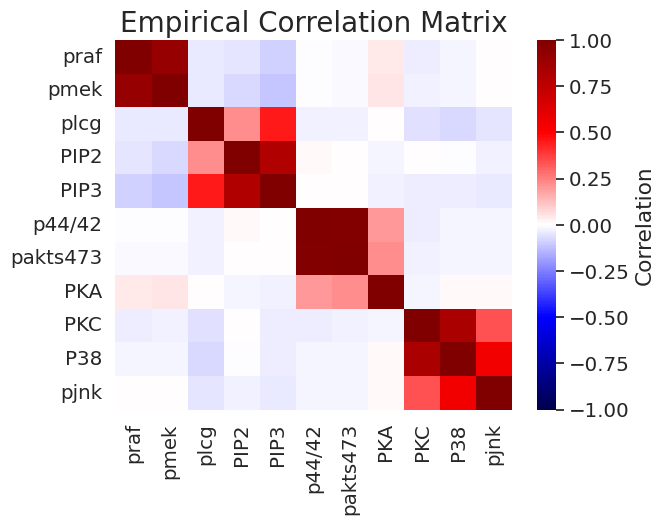

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
ax = sns.heatmap(data.corr(), cmap  ='seismic', vmin = -1, vmax = 1,
            cbar_kws={'label': 'Correlation'})
ax.set_title("Empirical Correlation Matrix", fontsize = 20)
plt.savefig("figures/graph_correlations.png", dpi = 300, bbox_inches = 'tight')
plt.show()
plt.style.use('default')

In [4]:
# compute the penalty hyperparameter via CV
cv_graph_lasso = GraphicalLassoCV(alphas = np.arange(1,500,1)).fit(data)
print(cv_graph_lasso.alpha_)


77


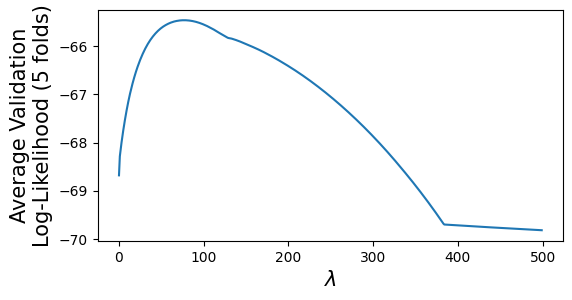

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(6, 3))
plt.plot(cv_graph_lasso.cv_results_['alphas'], cv_graph_lasso.cv_results_['mean_test_score'])
plt.ylabel("Average Validation\nLog-Likelihood (5 folds)", size = 15)
plt.xlabel("$\lambda$", size = 15)
plt.savefig("figures/graph_cv.png", dpi = 300, bbox_inches = "tight")

# Top 2 Graph Structures

In [6]:
import pickle
with open("results/graph/prob_weights10000_dataset0JNone.pkl", 'rb') as f:
    d = pickle.load(f)

In [7]:
from model_selection import top_k_sets
top2 = top_k_sets(d, list(d.values()), 2)

In [8]:
node_names = {}
for i in range(len(data.columns)):
    node_names[i] = data.columns[i]

In [9]:
import networkx as nx
G = nx.from_numpy_array(np.array(top2[1]).reshape(11,11))
edge_colors = ["blue" if i == ('pakts473','pmek') or i == ('pmek','pakts473') else "black" for i in G.edges]

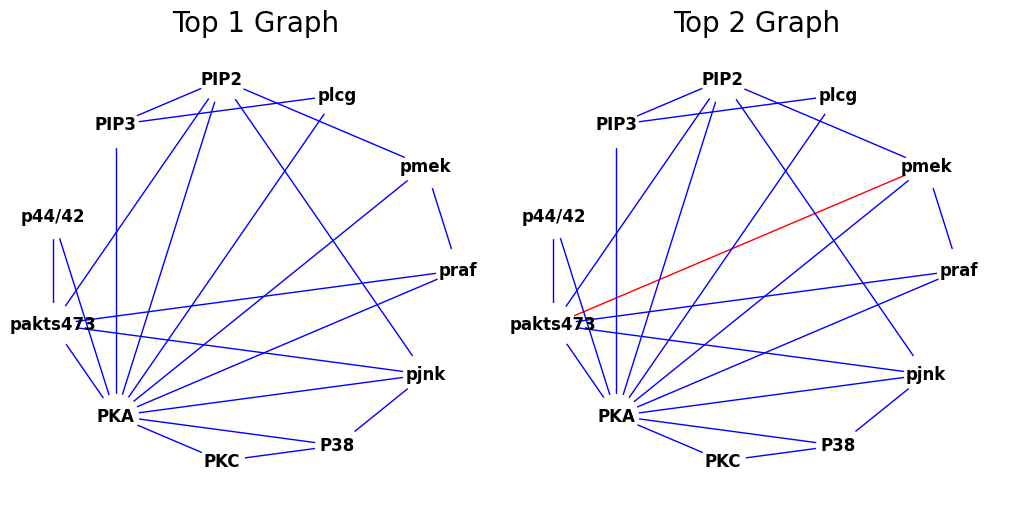

In [10]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))
for j in range(len(top2)):

    G = nx.from_numpy_array(np.array(top2[j]).reshape(11,11))
    # remove self loops
    for i in range(11):
        e = (i,i)
        G.remove_edge(*e)

    # rename nodes with the column names
    G = nx.relabel_nodes(G, node_names)
    edge_colors = ["red" if i == ('pakts473','pmek') or i == ('pmek','pakts473') else "blue" for i in G.edges]

    # create a circular layout for the plot
    pos = nx.circular_layout(G,scale = 10)

    # Draw the graph 
    nx.draw(G,pos, with_labels=True, node_size = 1000, 
            font_color='black', font_weight = "bold",
            node_color = "white",
            edge_color=edge_colors,
            ax=axs[j]
            )
    axs[j].set_title("Top {} Graph".format(j+1),fontsize = 20) 
plt.savefig("figures/top2graphs.png", dpi = 300, bbox_inches = "tight")
plt.show()